In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import xgi
import matplotlib.pyplot as plt
from src import *
import networkx as nx

In [5]:
G = nx.karate_club_graph()

A = nx.adjacency_matrix(G, weight=None)
n = np.size(A, axis=0)

In [6]:
rho = 0.05
save_data = False

In [29]:
s0 = np.zeros(n)
p_s = 0.1
s0[list(random.sample(range(n), int(p_s * n)))] = 1

nu = 1

c = 2
a = 0
gamma = 0.2
b = 0.4

g = lambda I, b : 1 - (1 - b) ** I
h = lambda I, a, c : 1/(1 + np.exp(-(I - c)/a)) if a != 0 else I >= c

f = lambda I : nu * g(I, b) + (1 - nu) * h(I, a, c)

x = contagion_process(A, gamma, beta, f, s0, tmin=0, tmax=200, dt=1, random_seed=None)

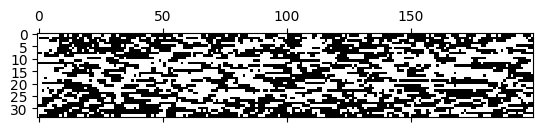

In [30]:
plt.spy(x.T)

In [31]:
samples = infer_adjacency_matrix(
    x, A, beta, f, rho, nsamples=100, burn_in=100, skip=100, return_likelihoods=False
)

Acceptance ratio is 0.0074


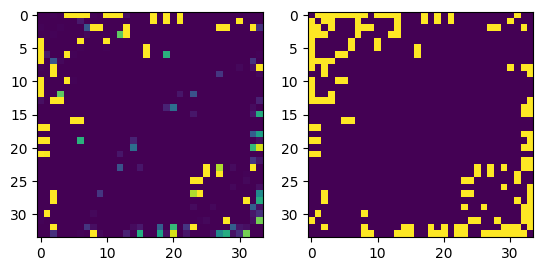

In [32]:
p = np.mean(samples, axis=0)
plt.subplot(121)
plt.imshow(p)
plt.subplot(122)
plt.imshow(A.todense())